1.Determine the areas on Earth where the surface wind has a predominant direction and where it does not.

For this, compute the correlation between the surface zonal and meridional wind at each location of the grid and plot over the map. 

Add the quiver plot to show the average surface wind. Use wind data from May2000-uvt.nc

In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.stats

In [30]:
#read file
fname='May2000-uvt.nc'
ds=xr.open_dataset(fname)

In [31]:
#Converting xarray to pandas.DataFrame
#date1 = datetime.datetime(year=2000,day=10,month=5)

wu=ds.u.sel(level=1000.0, method="nearest")
wv=ds.v.sel(level=1000.0, method="nearest")


x=ds.longitude
y=ds.latitude


#regrid data so that the plot is readable
qsx=6        # step along x axis
qsy=3        # step along y axis
x=x.isel(longitude=slice(0,144,qsx))
y=y.isel(latitude=slice(0,73,qsy))
wu=wu.isel(longitude=slice(0,144,qsx),latitude=slice(0,73,qsy))
wv=wv.isel(longitude=slice(0,144,qsx),latitude=slice(0,73,qsy))




In [32]:
av_wu = wu.mean(dim="time")
av_wv = wv.mean(dim="time")

In [33]:
#calculate windspeed
wind_speed = np.sqrt(av_wu**2 + av_wv**2)

In [43]:
location = wu.isel(time=0)

In [44]:
np.cov(wu[:,0,0],wv[:,0,0])
scipy.stats.pearsonr(wu[:,0,0], wv[:,0,0])

(-0.23974313267922812, 0.19393684240497316)

In [48]:
#plot
for n in range(len(ds.latitude)):
    for k in range(len(ds.longitude)):
        location[n,k]=scipy.stats.pearsonr(wu[:,n,k],wv[:,n,k])[0]


IndexError: index 24 is out of bounds for axis 2 with size 24

compute the correlation between the surface zonal and meridional wind at each location of the grid and plot over the map.

In [83]:
import scipy.stats as st
print(st.pearsonr(df1.u,df3.v))

(-0.054675943321787164, 3.555932266712244e-214)


/var/folders/vj/2fsd02sj7rn0y103cxtdzbq80000gn/T/ipykernel_1299/1379587695.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=plt.gca(projection=ccrs.PlateCarree())


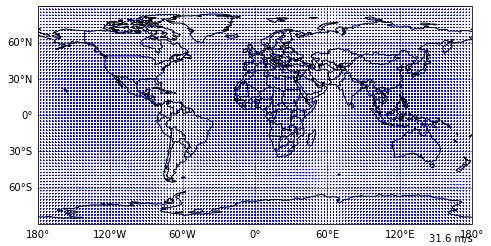

In [93]:
wmax=np.amax(np.sqrt(df1.u**2+df3.v**2))
fig1=plt.figure(figsize=(8,4.0))
ax=plt.gca(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
gl=ax.gridlines(draw_labels=True,linewidth=0.5, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

##Add the quiver plo  to show the average surface wind

qv=ax.quiver(x,y, df1.u, df3.v, color="blue")
q_typ=wmax
Qkey = ax.quiverkey(qv, 0.95, -0.12 , q_typ, '%.1f m/s' % q_typ, coordinates='axes')


In [56]:
wav=np.mean(x,axis=0)

<Figure size 576x288 with 0 Axes>

ompute the correlation between the surface zonal and meridional wind at each location of the grid